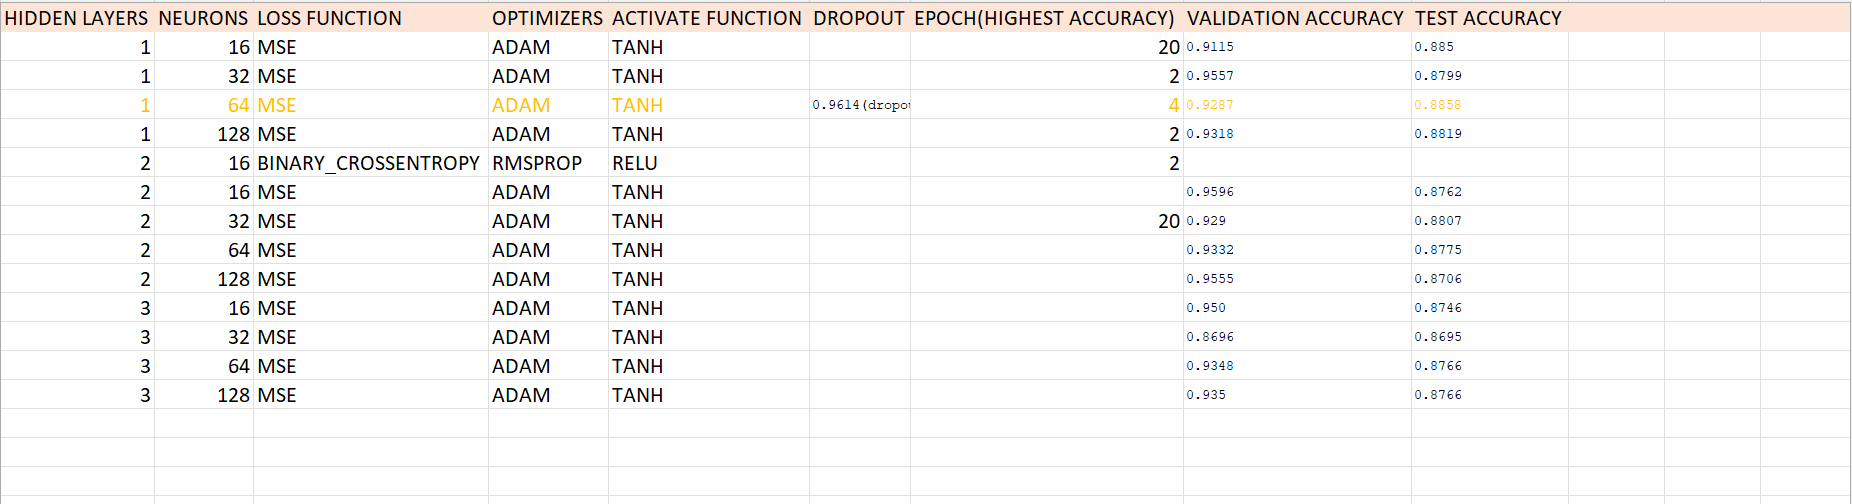

In [ ]:
Summary:
1. When used each hidden layers 1,2,3 to execute with neurons 16, 32, 64 we can see that maximum accuracy is attained when hidden layer is 1 and 64 nodes.
2. We have used generalization technique dropout to the one which have maximum accuracy. 
3. Comparing the test accuracy values of highest accuracy algorithm one with hyper parameter and without, we can observe that there is not must difference between both the test accuracies.  

In [54]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)


In [55]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [56]:
train_labels[0]

1

In [57]:
max([max(sequence) for sequence in train_data])

9999

In [58]:
#Decoding reviews back to text

In [59]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [60]:
#Preparinf data set

In [61]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [62]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [63]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [64]:
#Buliding Model

In [65]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [66]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [67]:
#Validating your approach

In [68]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [69]:
#Training  model

In [70]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5723 - accuracy: 0.7423 - val_loss: 0.4117 - val_accuracy: 0.8559
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3069 - accuracy: 0.8981 - val_loss: 0.2954 - val_accuracy: 0.8897
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2039 - accuracy: 0.9321 - val_loss: 0.2809 - val_accuracy: 0.8894
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1508 - accuracy: 0.9517 - val_loss: 0.2881 - val_accuracy: 0.8842
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1157 - accuracy: 0.9666 - val_loss: 0.2975 - val_accuracy: 0.8834
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0873 - accuracy: 0.9781 - val_loss: 0.3164 - val_accuracy: 0.8816
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0670 - accuracy: 0.9857 - val_loss: 0.3394 - val_accuracy: 0.8822
Epoch 8/20
30

In [71]:
#Compiling the model

In [72]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [73]:
#Plotting the training and validation loss

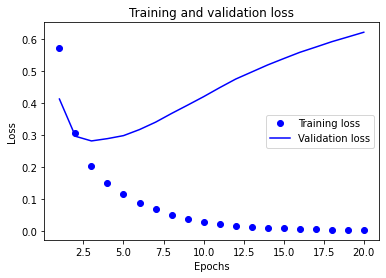

In [74]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [75]:
#Plotting the training and accuracy 


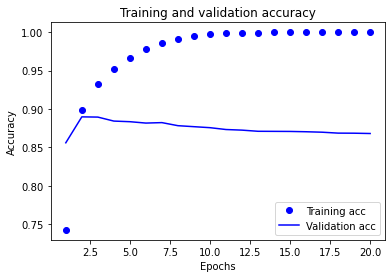

In [76]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [77]:
#Retraining a model from scratch

In [78]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4489 - accuracy: 0.8226
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2586 - accuracy: 0.9098
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2018 - accuracy: 0.9287
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2959 - accuracy: 0.8827


In [79]:
results

[0.29586344957351685, 0.8827199935913086]

In [80]:
#Using a trained model to generate predictions on new data

In [81]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.17031914],
       [0.9990291 ],
       [0.8739922 ],
       ...,
       [0.08244044],
       [0.05501057],
       [0.4795224 ]], dtype=float32)

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.1689 - binary_accuracy: 0.7874 - val_loss: 0.1211 - val_binary_accuracy: 0.8603
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0916 - binary_accuracy: 0.9045 - val_loss: 0.0975 - val_binary_accuracy: 0.8825
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0684 - binary_accuracy: 0.9324 - val_loss: 0.0895 - val_binary_accuracy: 0.8864
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0552 - binary_accuracy: 0.9481 - val_loss: 0.0869 - val_binary_accuracy: 0.8856
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0456 - binary_accuracy: 0.9603 - val_loss: 0.0850 - val_binary_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0386 - binary_accuracy: 0.9694 - val_loss: 0.0844 - val_binary_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - los

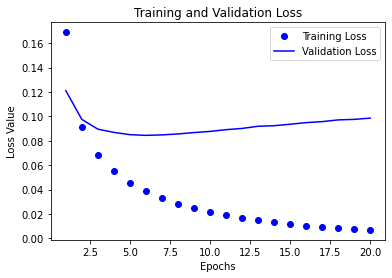

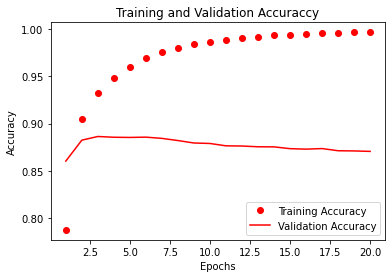

In [82]:
#implemented one hideden layer with 16 neurons and mse loss function 

from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])



x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



In [83]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/2
49/49 [==============================] - 2s 11ms/step - loss: 0.1492 - accuracy: 0.8221
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.0926 - accuracy: 0.8840


[0.09262750297784805, 0.8840000033378601]

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.1561 - binary_accuracy: 0.8049 - val_loss: 0.1076 - val_binary_accuracy: 0.8759
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0792 - binary_accuracy: 0.9123 - val_loss: 0.0900 - val_binary_accuracy: 0.8883
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0576 - binary_accuracy: 0.9405 - val_loss: 0.0858 - val_binary_accuracy: 0.8872
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0449 - binary_accuracy: 0.9571 - val_loss: 0.0843 - val_binary_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0359 - binary_accuracy: 0.9693 - val_loss: 0.0842 - val_binary_accuracy: 0.8840
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0292 - binary_accuracy: 0.9777 - val_loss: 0.0855 - val_binary_accuracy: 0.8824
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - los

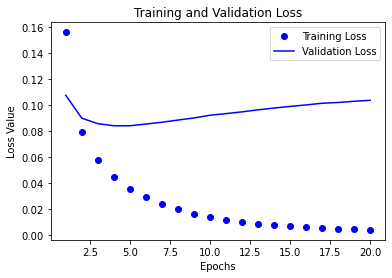

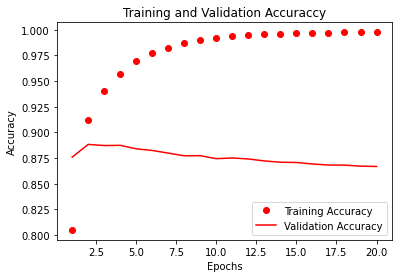

In [84]:
#implemented one hideden layer with 32 neurons and mse loss function 

from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [85]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/2
49/49 [==============================] - 1s 12ms/step - loss: 0.1373 - accuracy: 0.8320
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.0881 - accuracy: 0.8873


[0.0880509689450264, 0.8873199820518494]

Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 0.1410 - binary_accuracy: 0.8171 - val_loss: 0.0964 - val_binary_accuracy: 0.8782
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.0661 - binary_accuracy: 0.9249 - val_loss: 0.0844 - val_binary_accuracy: 0.8884
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0462 - binary_accuracy: 0.9521 - val_loss: 0.0842 - val_binary_accuracy: 0.8833
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0346 - binary_accuracy: 0.9691 - val_loss: 0.0845 - val_binary_accuracy: 0.8846
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0263 - binary_accuracy: 0.9791 - val_loss: 0.0868 - val_binary_accuracy: 0.8818
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0203 - binary_accuracy: 0.9859 - val_loss: 0.0893 - val_binary_accuracy: 0.8790
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - los

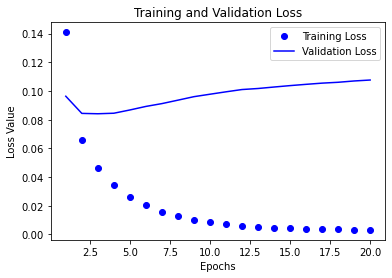

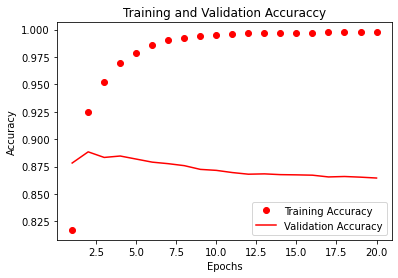

In [86]:
#implemented one hideden layer with 64 neurons and mse loss function 

from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



In [87]:

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
49/49 [==============================] - 2s 22ms/step - loss: 0.1198 - accuracy: 0.8427
Epoch 2/4
49/49 [==============================] - 1s 20ms/step - loss: 0.0601 - accuracy: 0.9273
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.0452 - accuracy: 0.9496
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.0923 - accuracy: 0.8743


[0.0922648012638092, 0.8742799758911133]

Epoch 1/20
30/30 [==============================] - 6s 40ms/step - loss: 0.1513 - binary_accuracy: 0.7975 - val_loss: 0.1000 - val_binary_accuracy: 0.8777
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0689 - binary_accuracy: 0.9229 - val_loss: 0.0850 - val_binary_accuracy: 0.8887
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0481 - binary_accuracy: 0.9520 - val_loss: 0.0832 - val_binary_accuracy: 0.8891
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0359 - binary_accuracy: 0.9677 - val_loss: 0.0845 - val_binary_accuracy: 0.8847
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0275 - binary_accuracy: 0.9791 - val_loss: 0.0871 - val_binary_accuracy: 0.8815
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0218 - binary_accuracy: 0.9852 - val_loss: 0.0884 - val_binary_accuracy: 0.8794
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - los

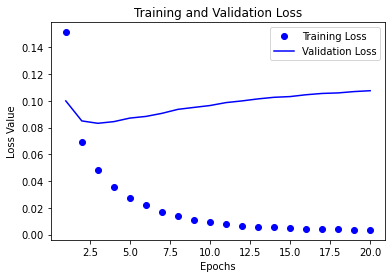

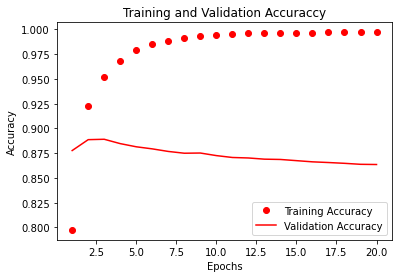

Epoch 1/4
49/49 [==============================] - 2s 19ms/step - loss: 0.1259 - accuracy: 0.8396
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.0623 - accuracy: 0.9252
Epoch 3/4
49/49 [==============================] - 1s 17ms/step - loss: 0.0465 - accuracy: 0.9484
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.0911 - accuracy: 0.8760


[0.09106682986021042, 0.8759999871253967]

In [88]:
#implemented one hideden layer with 64 neurons and mse loss function 

from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
layers.Dropout(0.5),
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.1293 - binary_accuracy: 0.8280 - val_loss: 0.0903 - val_binary_accuracy: 0.8822
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0578 - binary_accuracy: 0.9309 - val_loss: 0.0830 - val_binary_accuracy: 0.8906
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0391 - binary_accuracy: 0.9585 - val_loss: 0.0848 - val_binary_accuracy: 0.8854
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0274 - binary_accuracy: 0.9759 - val_loss: 0.0885 - val_binary_accuracy: 0.8812
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0204 - binary_accuracy: 0.9838 - val_loss: 0.0907 - val_binary_accuracy: 0.8781
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0151 - binary_accuracy: 0.9889 - val_loss: 0.0970 - val_binary_accuracy: 0.8696
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - los

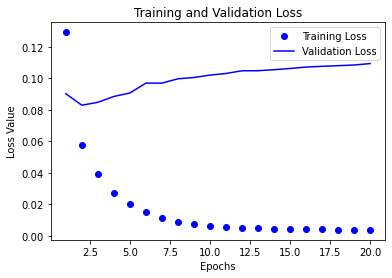

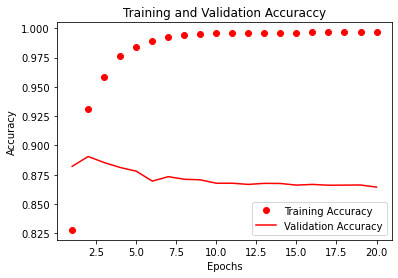

In [89]:
#implemented one hideden layer with 128 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



In [90]:
model = models.Sequential()
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/2
49/49 [==============================] - 2s 22ms/step - loss: 0.1167 - accuracy: 0.8446
Epoch 2/2
782/782 [==============================] - 3s 3ms/step - loss: 0.0884 - accuracy: 0.8800


[0.08843938261270523, 0.8799999952316284]

Epoch 1/20
30/30 [==============================] - 3s 59ms/step - loss: 0.1616 - binary_accuracy: 0.7970 - val_loss: 0.1073 - val_binary_accuracy: 0.8700
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0744 - binary_accuracy: 0.9156 - val_loss: 0.0863 - val_binary_accuracy: 0.8864
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0488 - binary_accuracy: 0.9467 - val_loss: 0.0833 - val_binary_accuracy: 0.8867
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0346 - binary_accuracy: 0.9664 - val_loss: 0.0860 - val_binary_accuracy: 0.8804
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0250 - binary_accuracy: 0.9787 - val_loss: 0.0886 - val_binary_accuracy: 0.8791
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0187 - binary_accuracy: 0.9861 - val_loss: 0.0914 - val_binary_accuracy: 0.8777
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - los

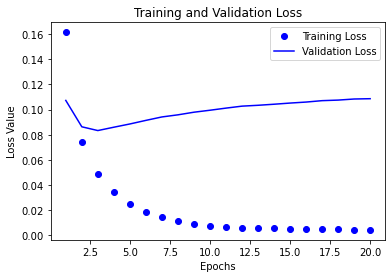

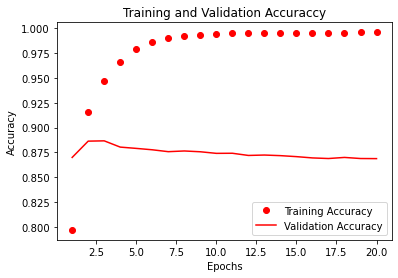

In [91]:
#implemented two hidden layer with 16 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [92]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/2
49/49 [==============================] - 1s 11ms/step - loss: 0.1393 - accuracy: 0.8234
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.0854 - accuracy: 0.8848


[0.08544862270355225, 0.8848000168800354]

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1511 - binary_accuracy: 0.8075 - val_loss: 0.0973 - val_binary_accuracy: 0.8752
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0640 - binary_accuracy: 0.9211 - val_loss: 0.0850 - val_binary_accuracy: 0.8850
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0404 - binary_accuracy: 0.9533 - val_loss: 0.0846 - val_binary_accuracy: 0.8848
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0272 - binary_accuracy: 0.9724 - val_loss: 0.0887 - val_binary_accuracy: 0.8815
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0186 - binary_accuracy: 0.9831 - val_loss: 0.0929 - val_binary_accuracy: 0.8767
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0132 - binary_accuracy: 0.9894 - val_loss: 0.0971 - val_binary_accuracy: 0.8756
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - los

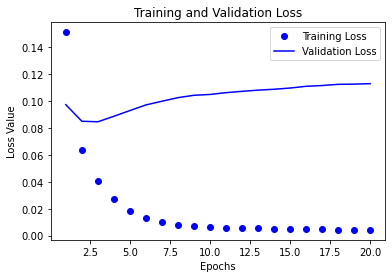

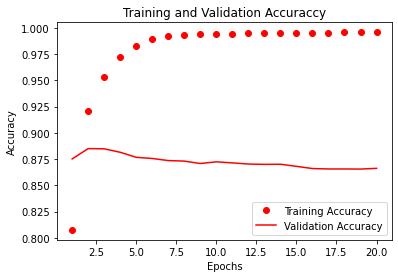

In [93]:
#implemented two hideden layer with 16 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [94]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/2
49/49 [==============================] - 1s 15ms/step - loss: 0.1265 - accuracy: 0.8337
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.0864 - accuracy: 0.8822


[0.0864405557513237, 0.8822000026702881]

Epoch 1/20
30/30 [==============================] - 2s 59ms/step - loss: 0.1377 - binary_accuracy: 0.8111 - val_loss: 0.0856 - val_binary_accuracy: 0.8853
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0522 - binary_accuracy: 0.9351 - val_loss: 0.0875 - val_binary_accuracy: 0.8816
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0324 - binary_accuracy: 0.9641 - val_loss: 0.0916 - val_binary_accuracy: 0.8781
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0214 - binary_accuracy: 0.9783 - val_loss: 0.0972 - val_binary_accuracy: 0.8758
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0150 - binary_accuracy: 0.9857 - val_loss: 0.1017 - val_binary_accuracy: 0.8737
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0112 - binary_accuracy: 0.9899 - val_loss: 0.1050 - val_binary_accuracy: 0.8710
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - los

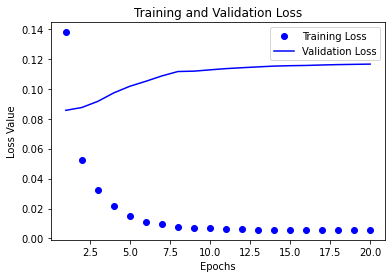

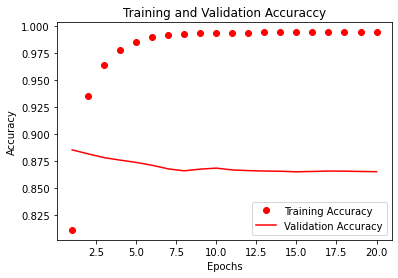

In [95]:
#implemented two hideden layer with 64 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [96]:
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/2
49/49 [==============================] - 2s 18ms/step - loss: 0.1170 - accuracy: 0.8397
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.0928 - accuracy: 0.8760


[0.09281282126903534, 0.8759999871253967]

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.1293 - binary_accuracy: 0.8185 - val_loss: 0.0836 - val_binary_accuracy: 0.8895
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0484 - binary_accuracy: 0.9382 - val_loss: 0.0875 - val_binary_accuracy: 0.8826
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0291 - binary_accuracy: 0.9677 - val_loss: 0.0962 - val_binary_accuracy: 0.8749
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0188 - binary_accuracy: 0.9805 - val_loss: 0.1012 - val_binary_accuracy: 0.8746
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0139 - binary_accuracy: 0.9867 - val_loss: 0.1055 - val_binary_accuracy: 0.8740
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0115 - binary_accuracy: 0.9893 - val_loss: 0.1096 - val_binary_accuracy: 0.8689
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - los

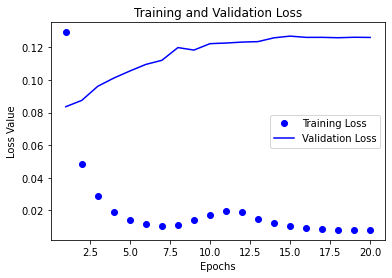

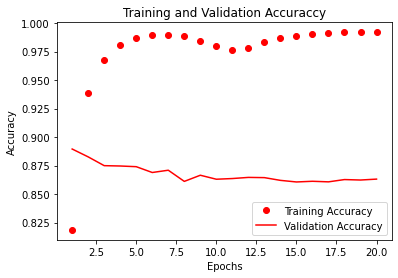

In [97]:
#implemented two hideden layer with 128 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [98]:
model = models.Sequential()
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/2
49/49 [==============================] - 2s 23ms/step - loss: 0.1085 - accuracy: 0.8509
Epoch 2/2
782/782 [==============================] - 3s 3ms/step - loss: 0.0932 - accuracy: 0.8767


[0.09319932758808136, 0.8766800165176392]

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.1753 - binary_accuracy: 0.7819 - val_loss: 0.1144 - val_binary_accuracy: 0.8648
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0774 - binary_accuracy: 0.9115 - val_loss: 0.0844 - val_binary_accuracy: 0.8887
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0464 - binary_accuracy: 0.9473 - val_loss: 0.0832 - val_binary_accuracy: 0.8867
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0302 - binary_accuracy: 0.9687 - val_loss: 0.0872 - val_binary_accuracy: 0.8822
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0203 - binary_accuracy: 0.9818 - val_loss: 0.0927 - val_binary_accuracy: 0.8760
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0146 - binary_accuracy: 0.9873 - val_loss: 0.0969 - val_binary_accuracy: 0.8757
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - los

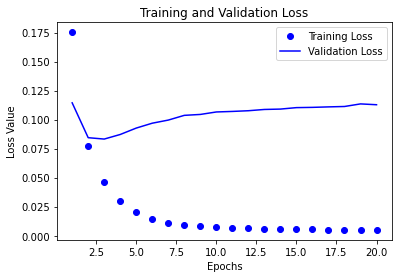

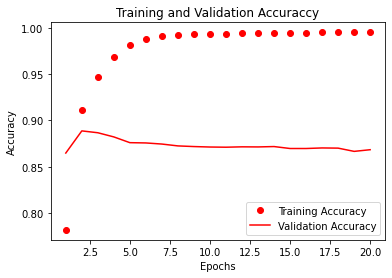

In [99]:
#implemented three hideden layer with 16 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [100]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/2
49/49 [==============================] - 1s 12ms/step - loss: 0.1347 - accuracy: 0.8326
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.0868 - accuracy: 0.8830


[0.08675289899110794, 0.8829600214958191]

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1526 - binary_accuracy: 0.7958 - val_loss: 0.0900 - val_binary_accuracy: 0.8783
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0567 - binary_accuracy: 0.9279 - val_loss: 0.0830 - val_binary_accuracy: 0.8878
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0329 - binary_accuracy: 0.9613 - val_loss: 0.0904 - val_binary_accuracy: 0.8787
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0210 - binary_accuracy: 0.9790 - val_loss: 0.0971 - val_binary_accuracy: 0.8778
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0143 - binary_accuracy: 0.9867 - val_loss: 0.1026 - val_binary_accuracy: 0.8726
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0114 - binary_accuracy: 0.9891 - val_loss: 0.1076 - val_binary_accuracy: 0.8709
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - los

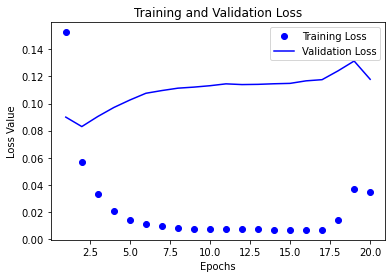

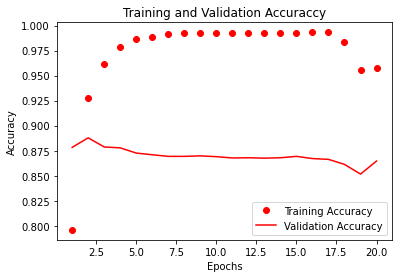

In [101]:
#implemented three hideden layer with 32 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [102]:
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/2
49/49 [==============================] - 2s 13ms/step - loss: 0.1197 - accuracy: 0.8426
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.0918 - accuracy: 0.8772


[0.09177339822053909, 0.8771600127220154]

Epoch 1/20
30/30 [==============================] - 2s 43ms/step - loss: 0.1301 - binary_accuracy: 0.8207 - val_loss: 0.0869 - val_binary_accuracy: 0.8836
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0497 - binary_accuracy: 0.9362 - val_loss: 0.0883 - val_binary_accuracy: 0.8853
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0297 - binary_accuracy: 0.9651 - val_loss: 0.0957 - val_binary_accuracy: 0.8775
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0205 - binary_accuracy: 0.9772 - val_loss: 0.1034 - val_binary_accuracy: 0.8732
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0160 - binary_accuracy: 0.9833 - val_loss: 0.1105 - val_binary_accuracy: 0.8697
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0147 - binary_accuracy: 0.9844 - val_loss: 0.1152 - val_binary_accuracy: 0.8675
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - los

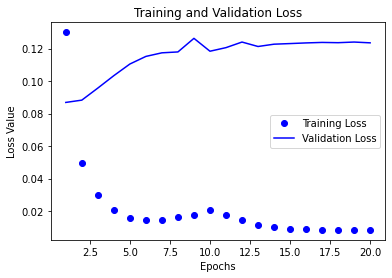

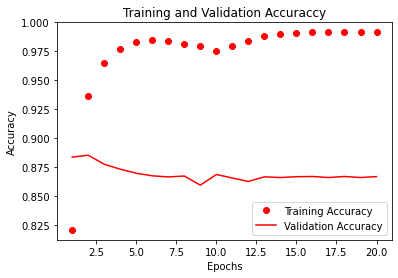

In [103]:
#implemented three hideden layer with 64 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [104]:
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/2
49/49 [==============================] - 2s 18ms/step - loss: 0.1114 - accuracy: 0.8484
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.0945 - accuracy: 0.8762


[0.09446453303098679, 0.8762000203132629]

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.1303 - binary_accuracy: 0.8151 - val_loss: 0.0843 - val_binary_accuracy: 0.8880
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0478 - binary_accuracy: 0.9405 - val_loss: 0.0894 - val_binary_accuracy: 0.8840
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0293 - binary_accuracy: 0.9661 - val_loss: 0.0996 - val_binary_accuracy: 0.8761
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0205 - binary_accuracy: 0.9783 - val_loss: 0.1061 - val_binary_accuracy: 0.8753
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0180 - binary_accuracy: 0.9808 - val_loss: 0.1119 - val_binary_accuracy: 0.8702
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0207 - binary_accuracy: 0.9763 - val_loss: 0.1245 - val_binary_accuracy: 0.8589
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - los

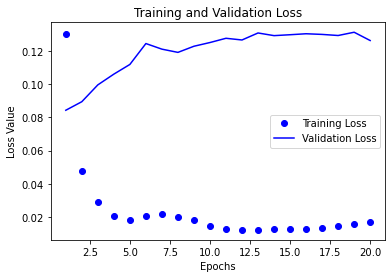

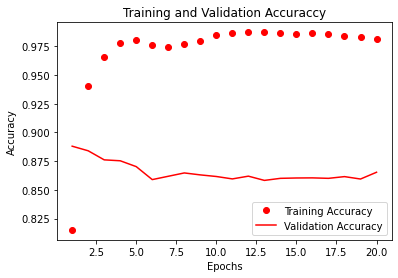

In [105]:
#implemented three hideden layer with 128 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [106]:
model = models.Sequential()
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/2
49/49 [==============================] - 2s 24ms/step - loss: 0.1069 - accuracy: 0.8519
Epoch 2/2
782/782 [==============================] - 3s 3ms/step - loss: 0.0974 - accuracy: 0.8718


[0.09738101810216904, 0.8717600107192993]